In [1]:

import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
!pip install pandas-datareader
from pandas_datareader import data as pdr
!pip install fix-yahoo-finance
import fix_yahoo_finance as yf

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
plt.style.use('fivethirtyeight')
%config InlineBackend.rc = {'font.size': 5, 'figure.figsize': (16.0, 8.0), 'figure.facecolor': (1, 1, 1, 0), 'figure.subplot.bottom': 0.125, 'figure.edgecolor': (1, 1, 1, 0), 'figure.dpi': 72}
import numpy as np
import pandas as pd

In [4]:
share = "GOOGL"
dataset = pdr.get_data_yahoo(share)
dataset = dataset.dropna() # removing missing value rows
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310
2010-01-11,302.532532,297.317322,302.532532,300.855865,14411300.0,300.855865
2010-01-12,299.379395,294.294281,299.124115,295.535522,9696800.0,295.535522
2010-01-13,294.484497,287.237244,288.533539,293.838837,12980200.0,293.838837
2010-01-14,297.397400,291.696686,292.242249,295.220215,8471700.0,295.220215


In [0]:
dates=(dataset.index.tolist())
close=list(dataset['Close'])

In [0]:
import math

In [0]:
close[:]=[x/max(close) for x in close]#normalising the closing price

In [8]:

from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

date_sentiments = {}

for i in range(1,11):
    page = urlopen('https://www.businesstimes.com.sg/search/google?page='+str(i)).read()#company whose data to be fetched
    soup = BeautifulSoup(page, features="html.parser")
    posts = soup.findAll("div", {"class": "media-body"})
    for post in posts:
        time.sleep(1)
        url = post.a['href']
        date = post.time.text
        print(date, url)
        try:
            
            link_page = urlopen(url).read()
            
        except:
            break
            
#           url = url[:-2]  
#             print(url)
            link_page = urlopen(url).read()
        link_soup = BeautifulSoup(link_page)
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
        sentiment = sia.polarity_scores(passage)['compound']
        date_sentiments.setdefault(date, []).append(sentiment)

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())

print(date_sentiment)

13 Apr 2019 https://www.businesstimes.com.sg/technology/google-takes-on-africas-challenges-with-first-ai-centre-in-ghana
13 Apr 2019 https://www.businesstimes.com.sg/technology/eu-copyright-revamp-targeting-google-facebook-set-for-approval-on-monday
05 Apr 2019 https://www.businesstimes.com.sg/technology/google-to-pull-plug-on-artificial-intelligence-ethics-council-vox
04 Apr 2019 https://www.businesstimes.com.sg/technology/googles-us-workforce-now-more-asian-and-less-white-and-male
03 Apr 2019 https://www.businesstimes.com.sg/technology/googles-us-workforce-grew-more-asian-less-white-and-male
03 Apr 2019 https://www.businesstimes.com.sg/consumer/walmart-enables-google-voice-activated-orders
02 Apr 2019 https://www.businesstimes.com.sg/consumer/walmart-unveils-voice-activated-google-powered-grocery-shopping-in-us
02 Apr 2019 https://www.businesstimes.com.sg/technology/google-huawei-in-ai-collaboration-despite-trade-war
28 Mar 2019 https://www.businesstimes.com.sg/government-economy/tru

In [0]:
datese=list(date_sentiment.keys())
Sentiment_values=list(date_sentiment.values())
datese.reverse()
Sentiment_values.reverse()



In [10]:
earliest_date = min(date_sentiment.keys())
print(type(earliest_date ))
s_date=(str(earliest_date)) 
s_date+" 00:00:00"

<class 'datetime.date'>


'2018-10-03 00:00:00'

In [11]:
print(str(dates[0]))
c=0
for i in range(len(dates)):
  if(str(dates[i])==(s_date+" 00:00:00")):
    c=i
    break
c  

2010-01-04 00:00:00


2203

In [0]:
import math

In [0]:
commulative=[]
d=Sentiment_values[0]
for i in range(1,len(Sentiment_values)):
  d=Sentiment_values[i]+d
  commulative.append((d))
 

In [0]:
commulative[:]=[y/max(commulative) for y in commulative]

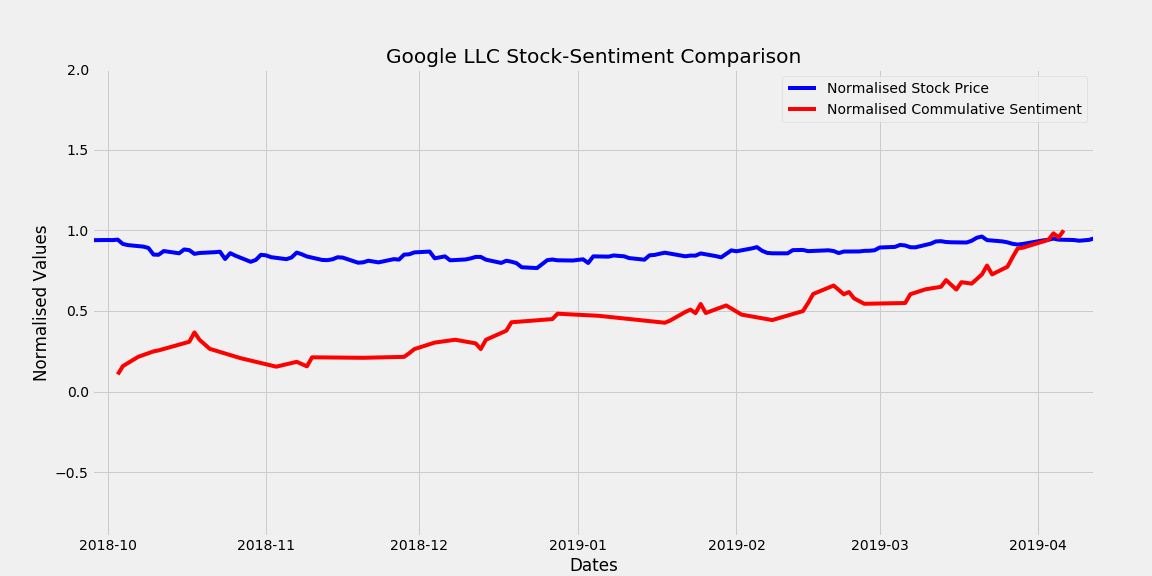

In [17]:

plt.plot(dates[2200:], close[2200:],linewidth=4.0,color='blue')
plt.plot(datese[:-1], commulative,color='red')
plt.axis([dates[2200], dates[-1],(min(min(close),min(commulative))-1),((max(close)+max(commulative)))])

plt.legend(["Normalised Stock Price","Normalised Commulative Sentiment"])
plt.title("Google LLC Stock-Sentiment Comparison")
# plt.xticks(rotation=10)
plt.xlabel("Dates")
plt.ylabel("Normalised Values")
plt.show()

In [18]:
share = "IBM"
dataset = pdr.get_data_yahoo(share)
dataset = dataset.dropna() # removing missing value rows
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,132.970001,130.850006,131.179993,132.449997,6155300.0,100.478867
2010-01-05,131.850006,130.100006,131.679993,130.850006,6841400.0,99.265091
2010-01-06,131.490005,129.809998,130.679993,130.000000,5605300.0,98.620255
2010-01-07,130.250000,128.910004,129.869995,129.550003,5840600.0,98.278870
2010-01-08,130.919998,129.050003,129.070007,130.850006,4197200.0,99.265091
2010-01-11,131.059998,128.669998,131.059998,129.479996,5730400.0,98.225777
2010-01-12,131.330002,129.000000,129.029999,130.509995,8081500.0,99.007156
2010-01-13,131.119995,129.160004,130.389999,130.229996,6455400.0,98.794746
2010-01-14,132.710007,129.910004,130.550003,132.309998,7111800.0,100.372673


In [19]:
dates=(dataset.index.tolist())
close=list(dataset['Close'])
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:

from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

date_sentiments = {}

for i in range(1,11):
    page = urlopen('https://www.businesstimes.com.sg/search/IBM?page='+str(i)).read()#company whose data to be fetched
    soup = BeautifulSoup(page, features="html.parser")
    posts = soup.findAll("div", {"class": "media-body"})
    for post in posts:
        time.sleep(1)
        url = post.a['href']
        date = post.time.text
        print(date, url)
        try:
            
            link_page = urlopen(url).read()
            
        except:
            break
            
#           url = url[:-2]  
#             print(url)
            link_page = urlopen(url).read()
        link_soup = BeautifulSoup(link_page)
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
        sentiment = sia.polarity_scores(passage)['compound']
        date_sentiments.setdefault(date, []).append(sentiment)

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())

print(date_sentiment)

19 Mar 2019 https://www.businesstimes.com.sg/garage/ibm-launches-new-blockchain-network-for-global-payments
09 Jan 2019 https://www.businesstimes.com.sg/technology/china-increases-us-patent-holdings-tenfold-from-2008-but-ibm-holds-on-to-top-spot
21 Dec 2018 https://www.businesstimes.com.sg/technology/ibm-manager-jetter-seen-in-lead-to-become-deutsche-boerse-chairman
31 Oct 2018 https://www.businesstimes.com.sg/opinion/ibms-acquisition-has-implications-for-singapores-push-for-the-cloud
30 Oct 2018 https://www.businesstimes.com.sg/technology/ibm-chases-amazon-into-cloud-with-us33b-red-hat-purchase
29 Oct 2018 https://www.businesstimes.com.sg/stocks/us-stocks-bounce-after-big-ibm-acquisition
29 Oct 2018 https://www.businesstimes.com.sg/technology/ibm-buys-software-company-red-hat-for-us34b-statement
18 Oct 2018 https://www.businesstimes.com.sg/technology/ibm-misses-sales-estimates-casting-doubt-on-growth-engines-0
17 Oct 2018 https://www.businesstimes.com.sg/technology/ibm-misses-sales-es

In [0]:

datese=list(date_sentiment.keys())
Sentiment_values=list(date_sentiment.values())
datese.reverse()
datese
Sentiment_values.reverse()

In [22]:
earliest_date = min(date_sentiment.keys())
print(type(earliest_date ))
s_date=(str(earliest_date)) 
s_date+" 00:00:00"

<class 'datetime.date'>


'2015-07-23 00:00:00'

In [23]:
print(str(dates[0]))
c=0
for i in range(len(dates)):
  if(str(dates[i])==(s_date+" 00:00:00")):
    c=i
    break
c  

2010-01-04 00:00:00


1397

In [0]:
commulative=[]
d=Sentiment_values[0]
for i in range(1,len(Sentiment_values)):
  d=Sentiment_values[i]+d
  commulative.append((d))


In [0]:

commulative[:]=[y/max(commulative) for y in commulative]

In [0]:
import math
close[:]=[x/max(close) for x in close]
#close[:]=[math.log(x) for x in close]

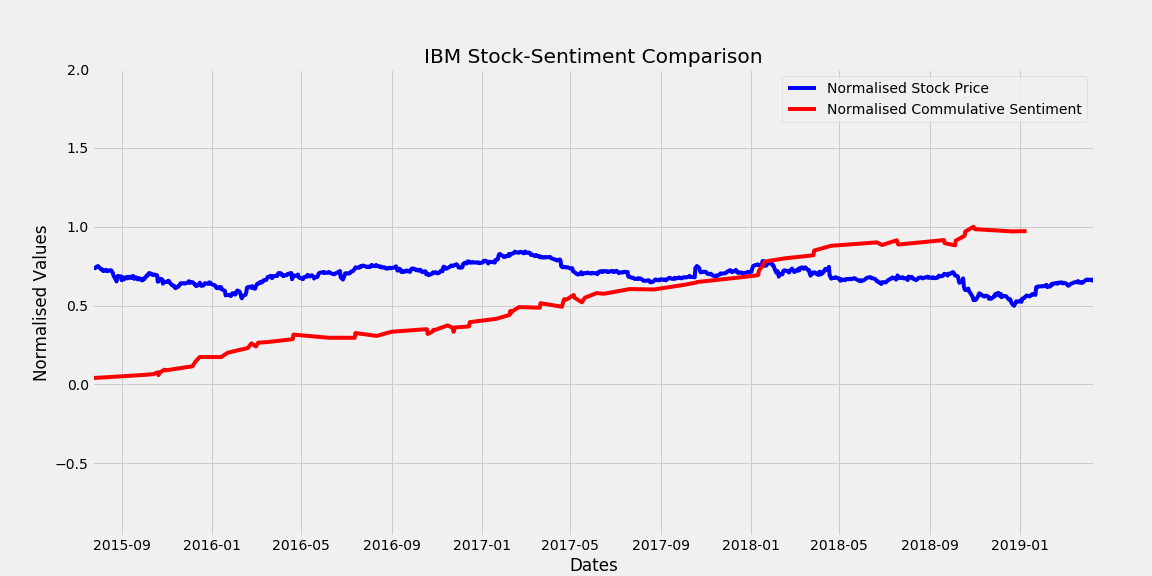

In [27]:

plt.plot(dates[c:], close[c:],linewidth=4.0,color='blue')
plt.plot(datese[:-1], commulative,color='red')
plt.axis([dates[c], dates[-1],(min(min(close),min(commulative))-1),((max(close)+max(commulative)))])

plt.legend(["Normalised Stock Price","Normalised Commulative Sentiment"])
plt.title("IBM Stock-Sentiment Comparison")
# plt.xticks(rotation=10)
plt.xlabel("Dates")
plt.ylabel("Normalised Values")
plt.show()

In [28]:
share = "AAPL"
dataset = pdr.get_data_yahoo(share)
dataset = dataset.dropna() # removing missing value rows
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.386072
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.421322
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.096491
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.059338
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.192701
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,20.014568
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.786903
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,20.066006
2010-01-14,30.065714,29.860001,30.015715,29.918571,108223500.0,19.949797


In [29]:
dates=(dataset.index.tolist())
close=list(dataset['Close'])
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:

from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

date_sentiments = {}

for i in range(1,15):
    page = urlopen('https://www.businesstimes.com.sg/search/APPLE?page='+str(i)).read()#company whose data to be fetched
    soup = BeautifulSoup(page, features="html.parser")
    posts = soup.findAll("div", {"class": "media-body"})
    for post in posts:
        time.sleep(1)
        url = post.a['href']
        date = post.time.text
        print(date, url)
        try:
            
            link_page = urlopen(url).read()
            
        except:
            break
            
#           url = url[:-2]  
#             print(url)
            link_page = urlopen(url).read()
        link_soup = BeautifulSoup(link_page)
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
        sentiment = sia.polarity_scores(passage)['compound']
        date_sentiments.setdefault(date, []).append(sentiment)

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())

print(date_sentiment)

12 Apr 2019 https://www.businesstimes.com.sg/technology/apple-adds-more-suppliers-to-clean-energy-programme
11 Apr 2019 https://www.businesstimes.com.sg/technology/apple-adds-foxconn-chip-suppliers-to-clean-energy-programme
09 Apr 2019 https://www.businesstimes.com.sg/companies-markets/banks-should-worry-about-apple-card
06 Apr 2019 https://www.businesstimes.com.sg/technology/does-apple-want-to-sell-tv-subscriptions-or-change-the-world
04 Apr 2019 https://www.businesstimes.com.sg/technology/japan-display-to-supply-oled-screens-for-apple-watch
02 Apr 2019 https://www.businesstimes.com.sg/energy-commodities/saudi-aramco-is-world%E2%80%99s-most-profitable-company-beating-apple-by-far
02 Apr 2019 https://www.businesstimes.com.sg/technology/apple-supplier-japan-display-to-seek-funding-shares-surge
01 Apr 2019 https://www.businesstimes.com.sg/technology/troubled-apple-supplier-japan-display-to-seek-funding-shares-surge
30 Mar 2019 https://www.businesstimes.com.sg/consumer/apple-pulls-plug-on

In [0]:
datese=list(date_sentiment.keys())
Sentiment_values=list(date_sentiment.values())
datese.reverse()
datese
Sentiment_values.reverse()

In [44]:
earliest_date = min(date_sentiment.keys())
print(type(earliest_date ))
s_date=(str(earliest_date)) 
s_date+" 00:00:00"

<class 'datetime.date'>


'2018-09-28 00:00:00'

In [45]:
print(str(dates[0]))
c=0
for i in range(len(dates)):
#   print(str(dates[i]))
  if(str(dates[i])==(s_date+" 00:00:00")):
    c=i
    break
c  


2010-01-04 00:00:00


2200

In [0]:
commulative=[]
d=Sentiment_values[0]
for i in range(1,len(Sentiment_values)):
  d=Sentiment_values[i]+d
  commulative.append((d))
commulative 

In [0]:
commulative[:]=[y/max(commulative) for y in commulative]

In [0]:
import math
close[:]=[x/max(close) for x in close]
#close[:]=[math.log(x) for x in close]

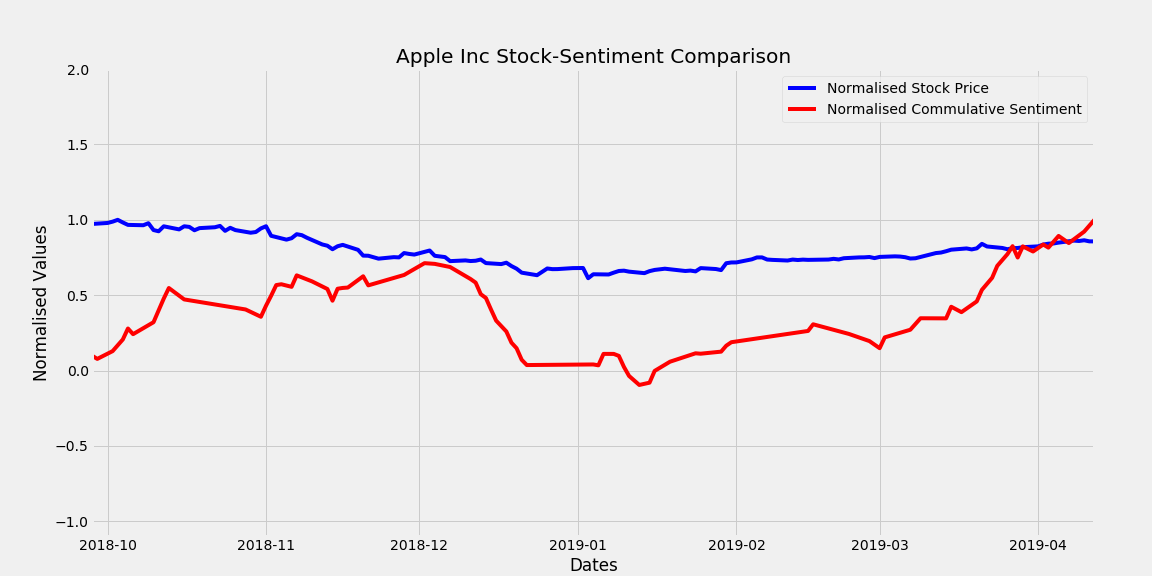

In [49]:

plt.plot(dates[c:], close[c:],linewidth=4.0,color='blue')
plt.plot(datese[:-1], commulative,color='red')
plt.axis([dates[c], dates[-1],(min(min(close),min(commulative))-1),((max(close)+max(commulative)))])

plt.legend(["Normalised Stock Price","Normalised Commulative Sentiment"])
plt.title("Apple Inc Stock-Sentiment Comparison")
# plt.xticks(rotation=10)
plt.xlabel("Dates")
plt.ylabel("Normalised Values")
plt.show()

In [57]:

from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

date_sentiments = {}

for i in range(1,15):
    page = urlopen('https://www.businesstimes.com.sg/search/Facebook?page='+str(i)).read()#company whose data to be fetched
    soup = BeautifulSoup(page, features="html.parser")
    posts = soup.findAll("div", {"class": "media-body"})
    for post in posts:
        time.sleep(1)
        url = post.a['href']
        date = post.time.text
        print(date, url)
        try:
            
            link_page = urlopen(url).read()
            
        except:
            break
            
#           url = url[:-2]  
#             print(url)
            link_page = urlopen(url).read()
        link_soup = BeautifulSoup(link_page)
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
        sentiment = sia.polarity_scores(passage)['compound']
        date_sentiments.setdefault(date, []).append(sentiment)

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())

print(date_sentiment)


13 Apr 2019 https://www.businesstimes.com.sg/technology/eu-copyright-revamp-targeting-google-facebook-set-for-approval-on-monday
13 Apr 2019 https://www.businesstimes.com.sg/technology/facebook-more-than-doubles-zuckerberg-compensation-to-us226m
12 Apr 2019 https://www.businesstimes.com.sg/technology/facebook-trying-to-stop-its-own-algorithms-from-doing-their-job
10 Apr 2019 https://www.businesstimes.com.sg/technology/facebook-enhances-memorialised-user-accounts
10 Apr 2019 https://www.businesstimes.com.sg/technology/canada-hails-facebook-ban-on-far-right-figures
09 Apr 2019 https://www.businesstimes.com.sg/government-economy/canada-hails-facebook-ban-on-far-right-figures
09 Apr 2019 https://www.businesstimes.com.sg/opinion/facebook-wants-a-faux-regulator-for-internet-speech-it-wont-happen
09 Apr 2019 https://www.businesstimes.com.sg/technology/headway-made-against-election-abuses-facebook
05 Apr 2019 https://www.businesstimes.com.sg/government-economy/facebook-vows-to-block-foreign-ad

In [58]:
share = "FB"
dataset = pdr.get_data_yahoo(share)
dataset = dataset.dropna() # removing missing value rows
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
2012-05-25,32.950001,31.110001,32.900002,31.910000,37149800,31.910000
2012-05-29,31.690001,28.650000,31.480000,28.840000,78063400,28.840000
2012-05-30,29.549999,27.860001,28.700001,28.190001,57267900,28.190001
2012-05-31,29.670000,26.830000,28.549999,29.600000,111639200,29.600000


In [59]:
dates=(dataset.index.tolist())
close=list(dataset['Close'])
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
datese=list(date_sentiment.keys())
Sentiment_values=list(date_sentiment.values())
datese.reverse()
datese
Sentiment_values.reverse()

In [61]:
earliest_date = min(date_sentiment.keys())
print(type(earliest_date ))
s_date=(str(earliest_date)) 
s_date+" 00:00:00"

<class 'datetime.date'>


'2018-09-21 00:00:00'

In [62]:
print(str(dates[0]))
c=0
for i in range(len(dates)):
#   print(str(dates[i]))
  if(str(dates[i])==(s_date+" 00:00:00")):
    c=i
    break
c  


2012-05-18 00:00:00


1596

In [0]:
commulative=[]
d=Sentiment_values[0]
for i in range(1,len(Sentiment_values)):
  d=Sentiment_values[i]+d
  commulative.append((d))
commulative 

In [0]:
commulative[:]=[y/max(commulative) for y in commulative]

In [0]:
import math
close[:]=[x/max(close) for x in close]
# close[:]=[math.log(x) for x in close]

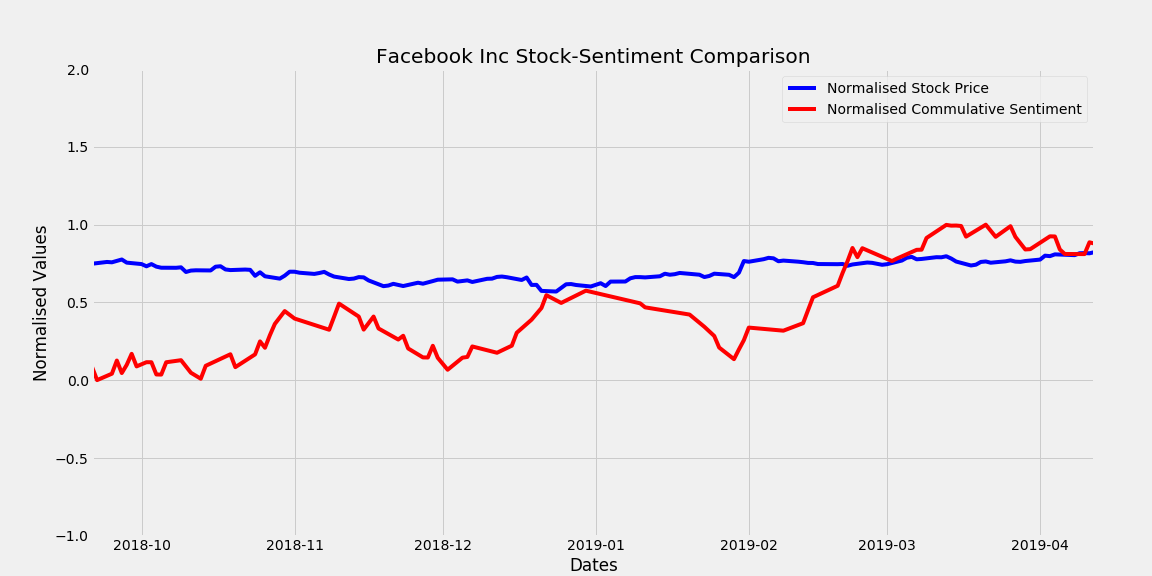

In [66]:
plt.plot(dates[c:], close[c:],linewidth=4.0,color='blue')
plt.plot(datese[:-1], commulative,color='red')
plt.axis([dates[c], dates[-1],(min(min(close),min(commulative))-1),((max(close)+max(commulative)))])

plt.legend(["Normalised Stock Price","Normalised Commulative Sentiment"])
plt.title("Facebook Inc Stock-Sentiment Comparison")
# plt.xticks(rotation=10)
plt.xlabel("Dates")
plt.ylabel("Normalised Values")
plt.show()